# Data Exploratory Analysis

---
1. Import packages
2. Load data with Pandas
3. Statistic description
4. Analysis with visualization
---

## 1. Import libraries

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---
## 2. Load data with Pandas

In [82]:
# Client data
client_data_filepath = r'D:\Various Dataset\BCGX_Forage\client_data (1).csv' # Input the path to client csv file after you store it locally
client_df = pd.read_csv(client_data_filepath)
 
# Price data 
price_data_filepath = r'D:\Various Dataset\BCGX_Forage\price_data (1).csv' # Input the path to price csv file after you store it locally
price_df = pd.read_csv(price_data_filepath)

In [83]:
print(client_df.columns)
print()
client_df.head(5)

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')



,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [84]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---
## 3. Statistic description


### Data type

---
Based on the data description, we can have several important observations on the client dataset:
1. The unit of observation is client
    - Each row in the dataset represents a unique client company. 
    - While some attributes reflect cumulative values since the beginning of the client-company relationship, others—such as electricity consumption over specific   periods—suggest a mix of static and time-dependent data. Notably, there is no explicit time-series structure linked to id.

2. The attributes of client:
    - Acquisition Sources – The sales channel through which the client was obtained (channel_sales).

    - Contract Details – Activation, modification, and renewal dates.

    - Consumption – Electricity and gas consumption over the past 12 months.

    - Forecasted Usage – Expected electricity demand and associated pricing.

    - Profitability Metrics – Gross and net margins generated from the client.

    - Customer Tenure – The number of years the client has been with the company (num_years_antig).

    - Churn Indicator – Whether the client is expected to churn within the next three months (churn).

3. Produce and serive:
    - The company provides both electricity and gas services (has_gas), implying that clients may have different energy consumption profiles and contract structures.

4. Forecast
    - The dataset includes multiple forecasted values related to electricity consumption, discounts, and energy pricing. However, the methodology behind these forecasts is not provided, and there is no data available to assess forecast accuracy. This limits immediate validation of forecast reliability.
---

In [85]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

We notice that date_activ, date_end, date_modif_prod, date_renewal are having object data type, which is not suitable and usable.
Change object => datetime

In [86]:
# Tranforms 4 columns from object to datetime data type

x = ['date_activ','date_end','date_modif_prod','date_renewal']

for i in x:
    client_df[i] = pd.to_datetime(client_df[i]) # Convert to datetime

print( client_df.dtypes)

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

---
Based on the price data, we can make several observation.

1. Unit of observation
    -  The existence of column id and date indicate that different clients may be charged with different price and price varies from time to time
2. Price attributes
    - There are three types of price, price for off-peak, mid-peak, and peak
    - The price is contructed from 2 component: variable price (change accordingly to the consumption) and fix price (constant no matter how much the consumption is)


In [87]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [88]:
price_df['price_date'] = pd.to_datetime(price_df['price_date']) # Convert to datetime

print(price_df.dtypes)

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object


###  Statistics

In [89]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [90]:
price_df.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


## 4. Visualization

In [91]:
# Create the stacked bar chart function
def plot_stacked_bar(dataframe, title_, size_=(18,9), rot_=0, legend_='upper right'):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind='bar',
        stacked=True,
        figsize = size_,
        rot=rot_,
        title=title_
    )
    # Annotate the bars
    annotate_stacked_bar(ax)
    # Set label
    plt.ylabel('Company base (%)')
    # Set legend
    plt.legend(['Retention','Churn'], loc=legend_)
    plt.show()

# Create annotation on the bars    
def annotate_stacked_bar(ax, pad=0.99, color_='white', textsize=14):
    """
    Add value annotation to the bars
    """
    # Iterate over the bars
    for p in ax.patches:

        # Calculate the value
        value = str(round(p.get_height(),1))
        # If it is equal zero, don't annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            xy=((p.get_x()+ p.get_width()/2)*pad-0.02, (p.get_y()+p.get_height()/2)*pad),
            color=color_,
            size=textsize
        )   


In [92]:
sns.set_theme()

### Churn

In [93]:
churn_pct = client_df['churn'].value_counts(normalize=True, sort=True).mul(100)
churn_pct = churn_pct.to_frame().T
churn_pct.index = ['Clients']
churn_pct


churn,0,1
Clients,90.284814,9.715186


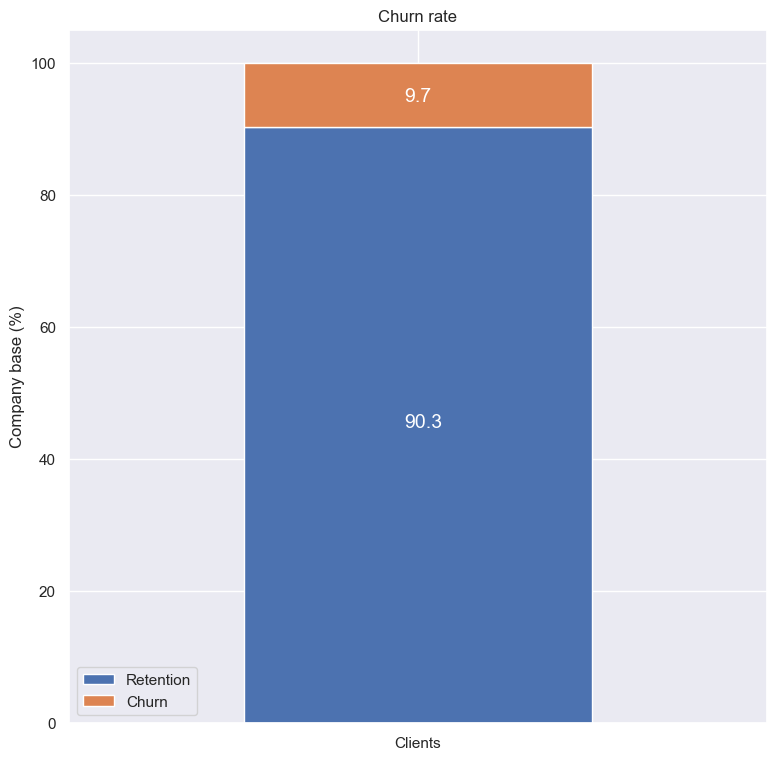

In [94]:
# visualize
plot_stacked_bar(churn_pct,'Churn rate',(9,9),0,'lower left')

### Sales channel

In [95]:
# Summurize
churn_salechannel = client_df.groupby(['channel_sales','churn'])['id'].count().reset_index()

# Pivot to create the right format for visualization
churn_salechannel_pv = churn_salechannel.pivot_table(index='channel_sales', columns='churn', values='id', fill_value=0)
churn_salechannel_pv = churn_salechannel_pv.sort_values(by=0,ascending=False)

# Calculate percentage
churn_salechannel_pv = churn_salechannel_pv.div(churn_salechannel_pv.sum(axis=1),axis=0).mul(100)
churn_salechannel_pv

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000


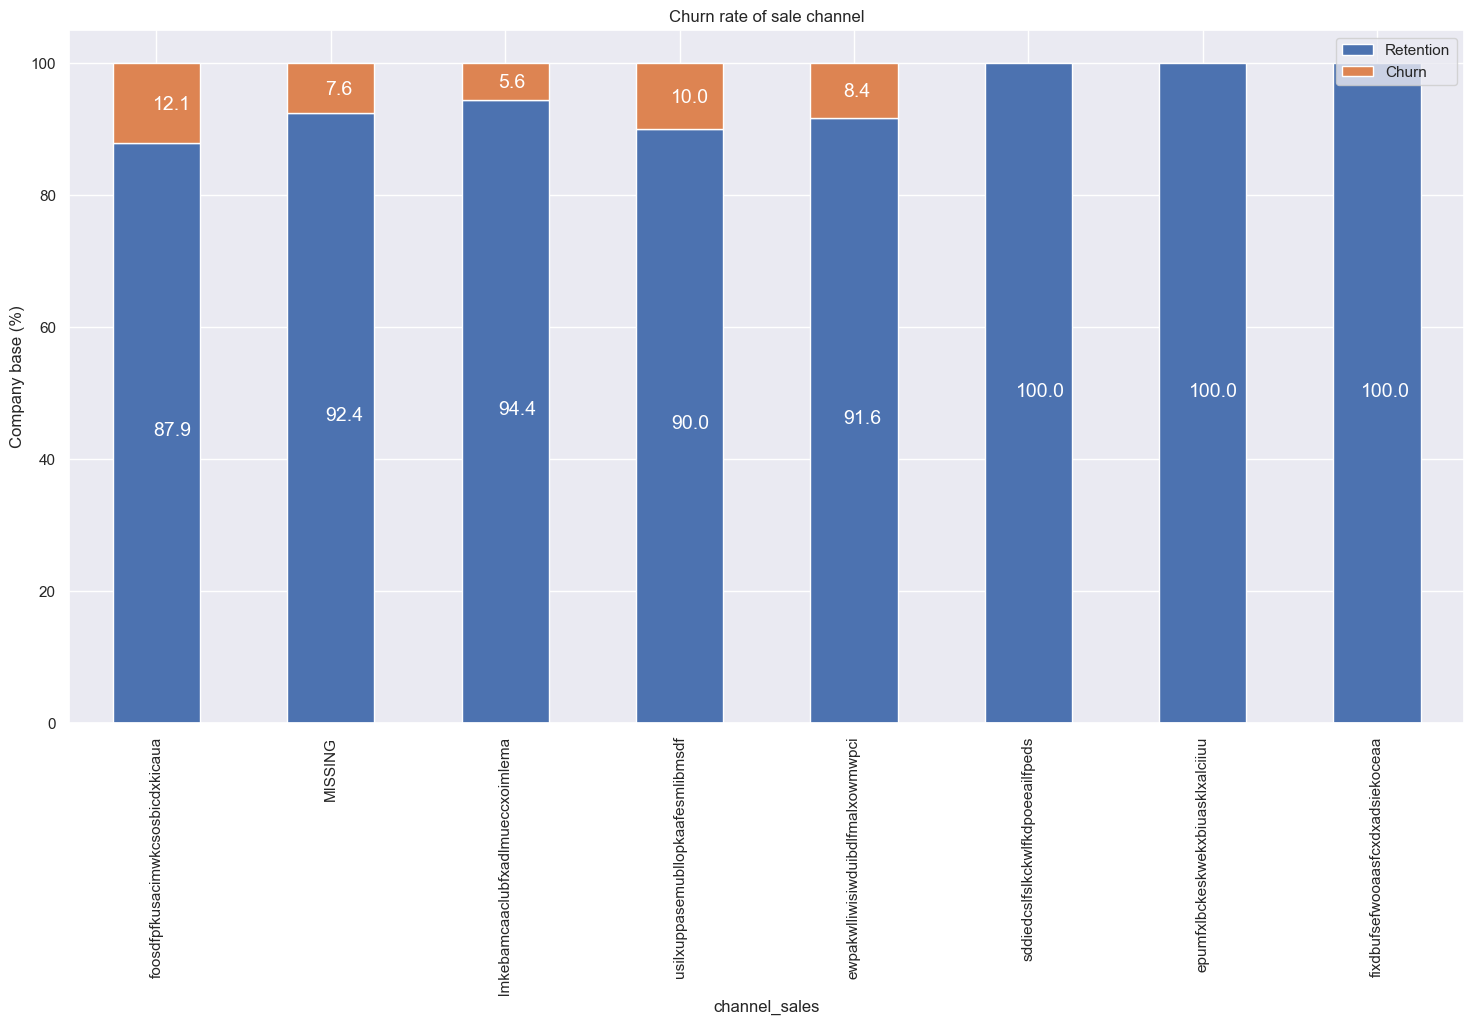

In [96]:
# visualize
plot_stacked_bar(churn_salechannel_pv,'Churn rate of sale channel',rot_= 90)

### Consumption

In [97]:
def plot_distribution(dataframe, column, ax_, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churn and retained customers.
    """
    # Define custom colors
    custom_palette = {0: 'blue', 1: 'orange'}

    # Create the histogram plot
    plot = sns.histplot(
        data=dataframe, 
        x=column, 
        hue='churn', 
        multiple='stack', 
        bins=bins_, 
        ax=ax_, 
        hue_order=[1, 0],  # Ensure churn is on top
        palette=custom_palette
    )

    # Set title for the subplot
    ax_.set_ylabel('Frequency')
    ax_.ticklabel_format(style='plain', axis='x')

In [98]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

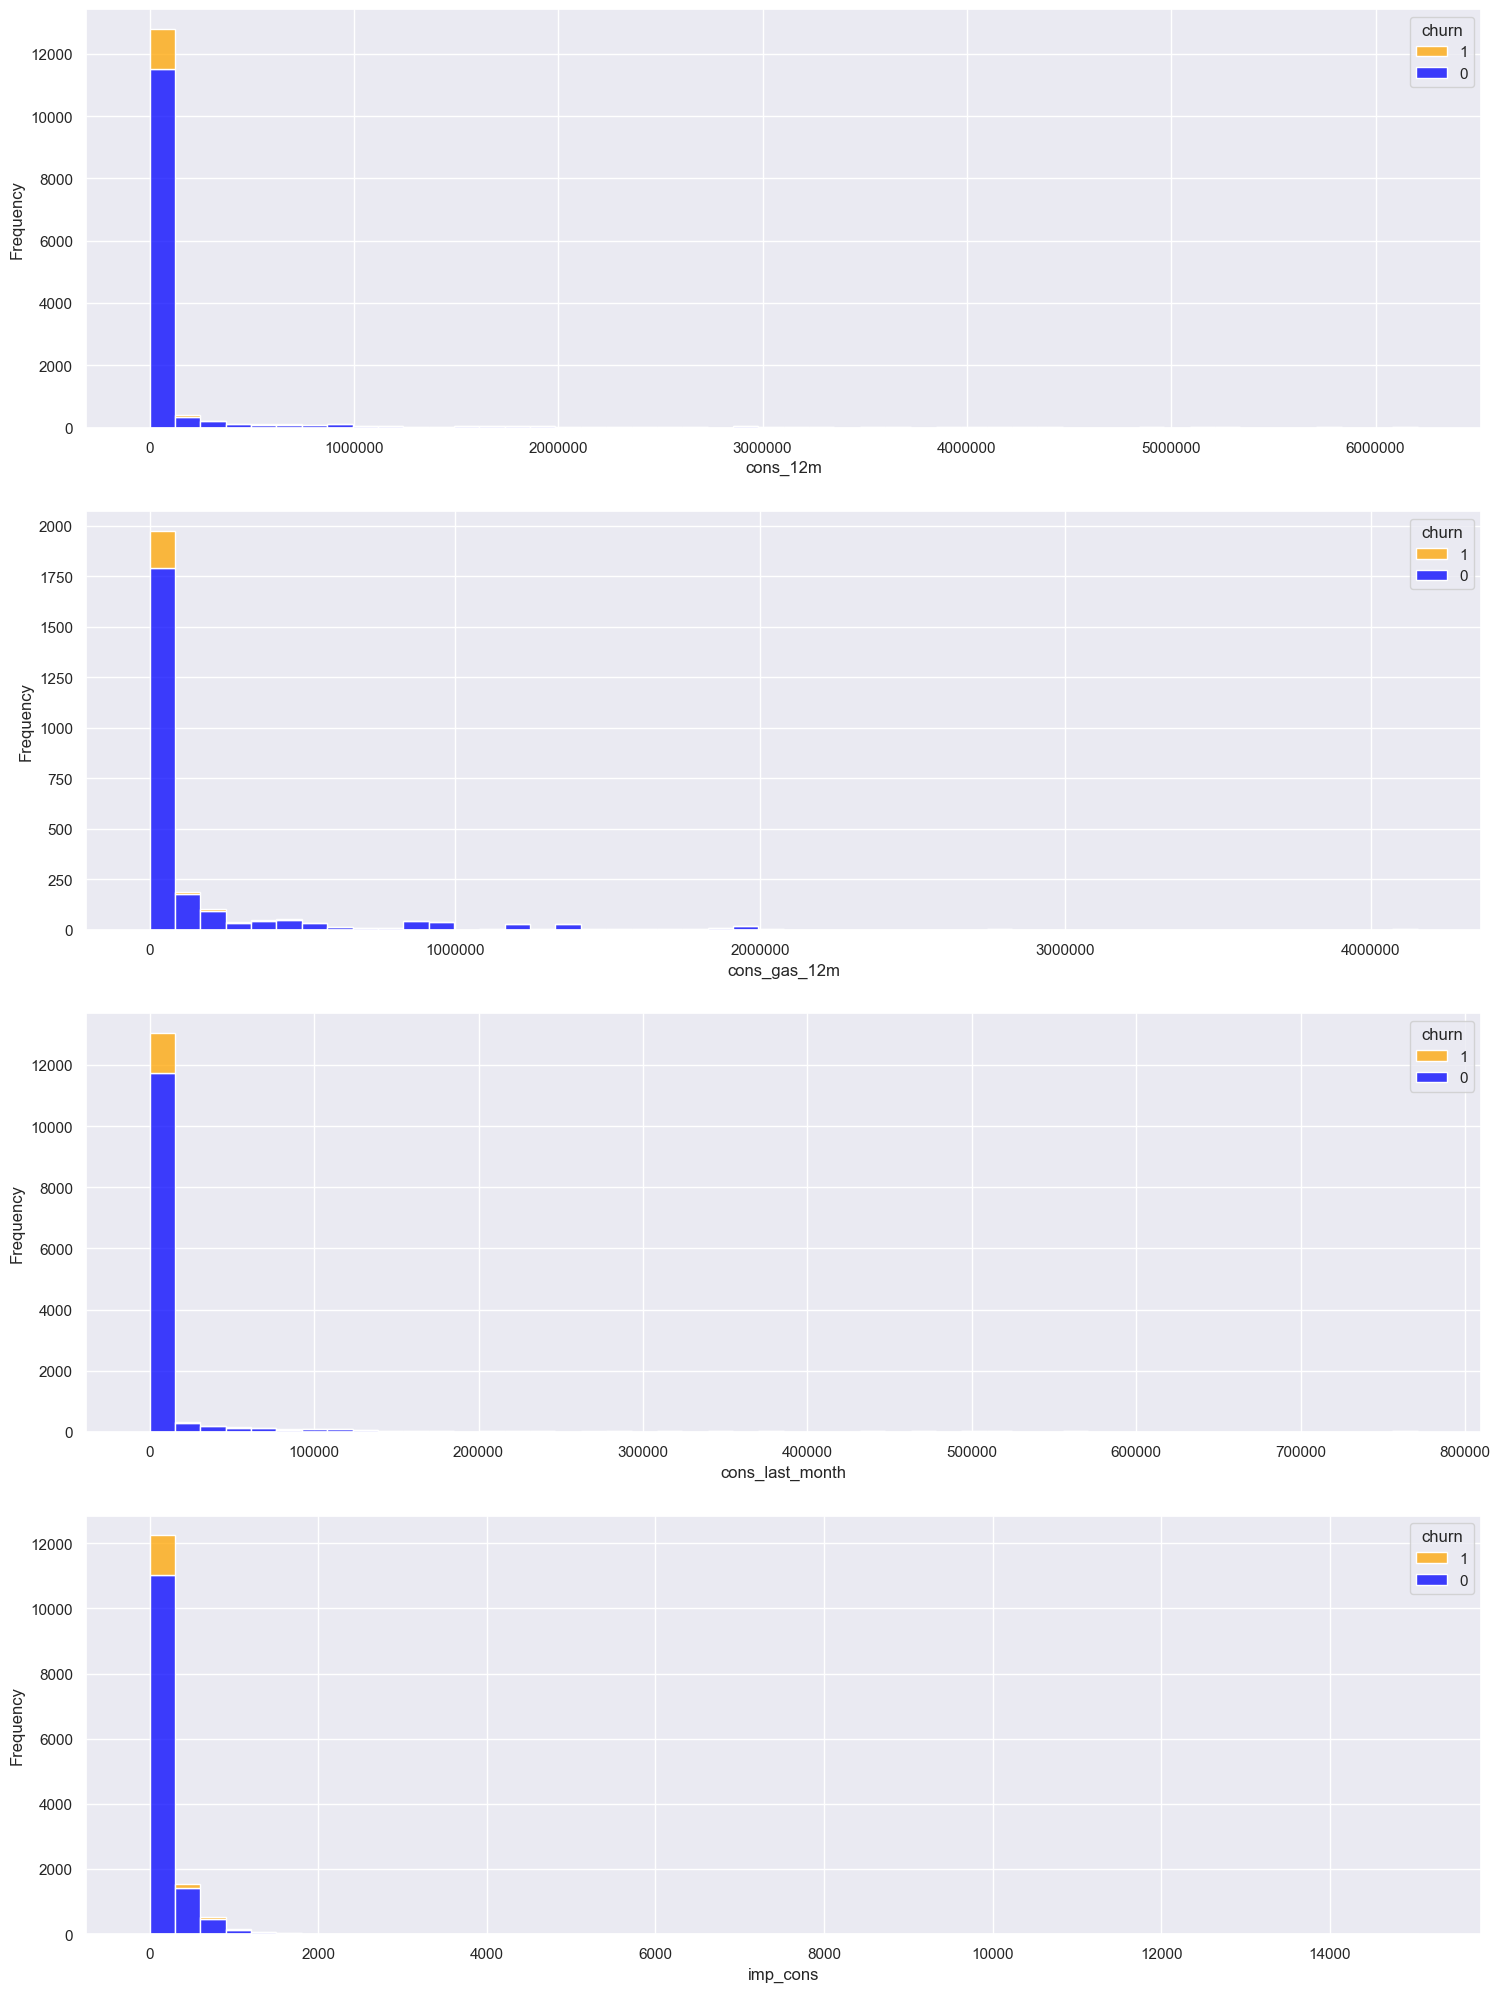

In [99]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

plot_distribution(consumption,'cons_12m',axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

It is revealed that the data is highly positively skewed, which means long right tail and a lot of outliner

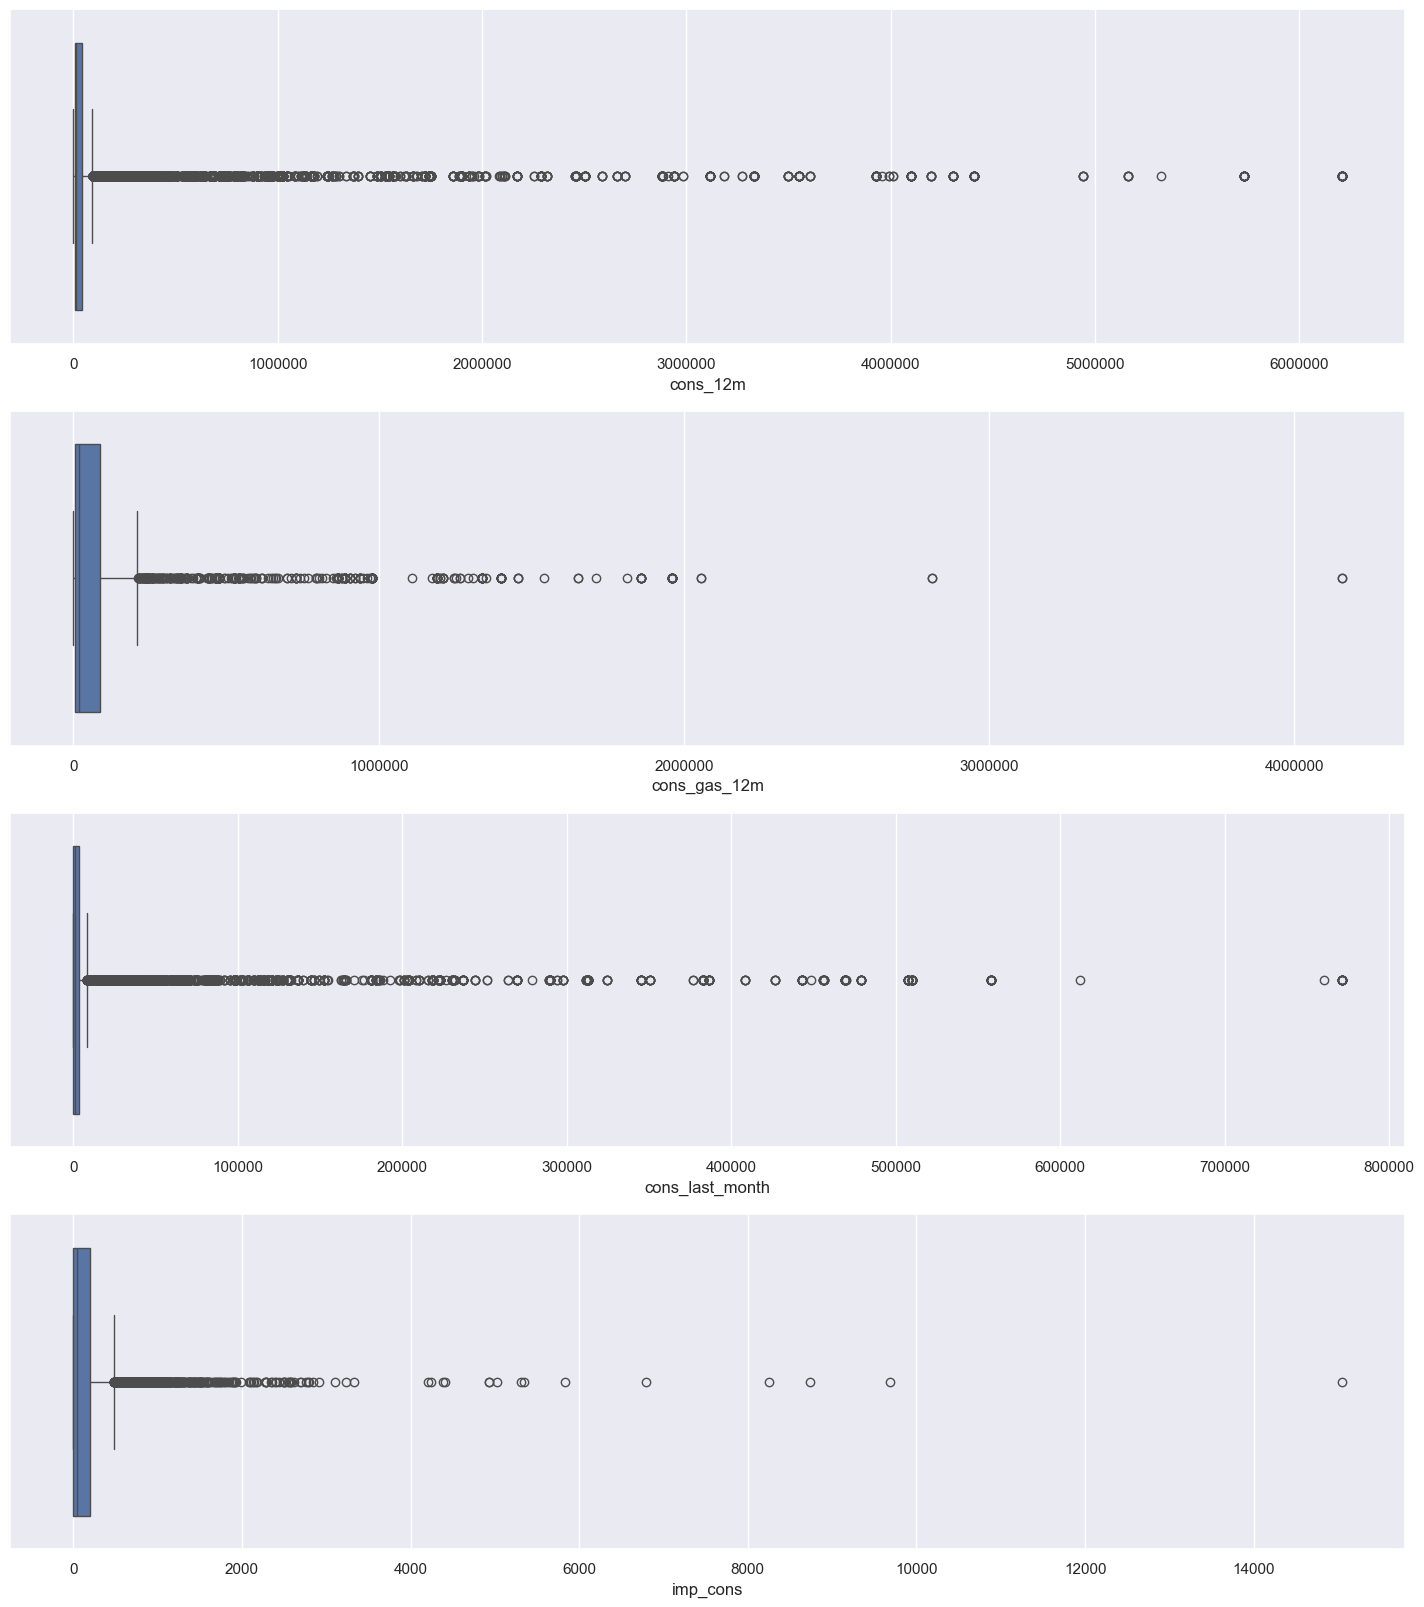

In [100]:
fig, axs = plt.subplots(nrows=4, figsize=(18,20))

# Plot histogram
sns.boxplot(consumption, x='cons_12m',ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t'], x='cons_gas_12m', ax=axs[1])
sns.boxplot(consumption, x='cons_last_month', ax=axs[2])
sns.boxplot(consumption, x='imp_cons', ax=axs[3])

# Format
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

# Churn modelling
---
1. Hypothesis formulating
2. Feature Engineering
3. Modeling
---

## 1. Hypothesis formulation
A. As we know price is always one of the most important factor for customers to select a product or service. The price rise can incur higher operating cost and lower margin for clients, therefore they will switch to competitors assuming that competitors have lower price. Secondly, the fluctuation of the price also introduce uncertainty to client's planning, which make them more anxious and look for alternatives
- H1: The difference between December off-peak price and that of preceding January help predicts the possibility of churn

B. A substantial and unpredictable price fluctuation can also be annoying to clients and encourage them to change service:
- H2: The max change in price helps predicts the possibility of churn

C. The how long the client has stay with the company may also affecs the churn possibility since long tenure clients may be more tolerance toward price fluctuation and they may be more loyal
- H3: The longer the tenure the lower the possibility of churn

D. The clients are more likely consider to end the contract in the beginning and the end of contract.
- H4: The number of months before contract end helps predict the churn possibility

E. The clients who have engage recently are more likely to stay.
- H5: the number of months since the latest modification on contract helps predict the possibility of churn

F. Similarly, the clients who are renew the contract recently are more likely to stay
- H6: the number of months since the latest contract renewal helps predict the possibility of churn



## 2. Featuring

In [101]:
# Make a copy
pr_client_df = client_df.copy()

### A. (H1)Featuring the difference between the off-peak price of December and that of January

In [102]:
price_df.head(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


In [103]:
# Get January price
jan_price = price_df.groupby('id')[['price_off_peak_var', 'price_off_peak_fix']].first()
jan_price.columns = ['jan_energy', 'jan_power']

# Get Decemebet price
dec_price = price_df.groupby('id')[['price_off_peak_var','price_off_peak_fix']].last()
dec_price.columns = ['dec_energy','dec_power']

# Join 2 tables
diff_price = pd.merge(jan_price, dec_price, right_index=True, left_index=True, how='outer')

# Calculate the difference
diff_price['diff_power'] = diff_price['dec_power'] - diff_price['jan_power']
diff_price['diff_energy'] = diff_price['dec_energy'] - diff_price['jan_energy']

diff_price_ = diff_price[['diff_power','diff_energy']]
diff_price_.head(5)

,diff_power,diff_energy
id,,
0002203ffbb812588b632b9e628cc38d,0.162916,-0.006192
0004351ebdd665e6ee664792efc4fd13,0.177779,-0.004104
0010bcc39e42b3c2131ed2ce55246e3c,1.500000,0.050443
0010ee3855fdea87602a5b7aba8e42de,0.162916,-0.010018
00114d74e963e47177db89bc70108537,-0.000001,-0.003994


In [104]:
# Join back to the data set designated for model
pr_client_df = pd.merge(pr_client_df, diff_price_, how='left', on='id')

### B. (H2)Featuring the max price change across the period(off-peak, mid-peak, and peak) and months

In [106]:
# Calculate the mean difference between consecutive periods
price_df['off_peak_peak_var_diff'] = price_df['price_off_peak_var'] - price_df['price_peak_var']
price_df['peak_mid_peak_var_diff'] = price_df['price_peak_var'] - price_df['price_mid_peak_var']
price_df['off_peak_mid_peak_var_diff'] = price_df['price_off_peak_var'] - price_df['price_mid_peak_var']
price_df['off_peak_peak_fix_diff'] = price_df['price_off_peak_fix'] - price_df['price_peak_fix']
price_df['peak_mid_peak_fix_diff'] = price_df['price_peak_fix'] - price_df['price_mid_peak_fix']
price_df['off_peak_mid_peak_fix_diff'] = price_df['price_off_peak_fix'] - price_df['price_mid_peak_fix']


# Get max difference across periods and months
max_price_diff = price_df.groupby('id').agg({
    'off_peak_peak_var_diff':lambda x: x.abs().max(),
    'peak_mid_peak_var_diff':lambda x: x.abs().max(),
    'off_peak_mid_peak_var_diff':lambda x: x.abs().max(),
    'off_peak_peak_fix_diff':lambda x: x.abs().max(),
    'peak_mid_peak_fix_diff':lambda x: x.abs().max(),
    'off_peak_mid_peak_fix_diff':lambda x: x.abs().max()
}).reset_index()
max_price_diff.columns = [
    'id',
    'off_peak_peak_var_max_diff',
    'peak_mid_peak_var_max_diff',
    'off_peak_mid_peak_var_max_diff',
    'off_peak_peak_fix_max_diff',
    'peak_mid_peak_fix_max_diff',
    'off_peak_mid_peak_fix_max_diff'
    ]

In [107]:
# Join back to the data set designated for model
pr_client_df = pd.merge(pr_client_df, max_price_diff, how='left', on='id')

### C. (H3)Featuring tenure period

In [108]:
# Get tenure year by iteration
for _, row in pr_client_df.iterrows():
    if row['date_activ'] > row['date_end']:
        pr_client_df.at[_, 'tenure'] = np.nan  # Assign NaN if condition is met
    else:
        # Calculate tenure as the difference in days divided by 365
        pr_client_df.at[_, 'tenure'] = int((row['date_end'] - row['date_activ']).days / 365.25)



In [109]:
# Get tenure year
pr_client_df['tenure'] = np.where(
    pr_client_df['date_activ'] > pr_client_df['date_end'],
    np.nan, # nan value invalid entries
    ((pr_client_df['date_end'] - pr_client_df['date_activ']).dt.days / 365.25).astype(int)  # Calculate tenure
)

<Axes: xlabel='tenure', ylabel='churn'>

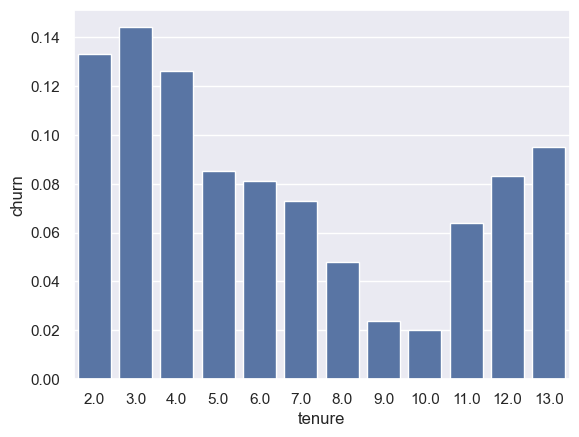

In [110]:
# Churn rate of different tenure group
tenure_churn = pr_client_df.groupby('tenure').agg({'churn':'mean'}).reset_index()
tenure_churn['churn'] = round(tenure_churn['churn'],3)

# Visualize
sns.barplot(data=tenure_churn, x='tenure',y='churn')

As we see from the graph, the churn rate seems to decline gradually as the clients stay longer. There is a substantial plunge between year 4 and year 5, which means this may be an important milestone for retaining client.
It is also quite noticable that churn rate also rises significantly after year 10

### D. (H4)Featuring number of months before the contract end

In [111]:
# Create convert function that calculate the number of months from a series of date to a certain reference date
from datetime import datetime as dt

def months2refdate(refdate,date_series):
    months = (refdate.year - date_series.dt.year)*12 + (presentdate.month - date_series.dt.month)
    days_diff = (refdate - date_series).dt.days
    adjustment = (abs(days_diff) < 30).astype(int)
    months -= adjustment
    return  months

# Assumption about the present date
presentdate = dt(2016,1,1)

In [112]:
# Create the column to stored number of months before contract end
pr_client_df['months2end'] = months2refdate(presentdate, pr_client_df['date_end'])

In [113]:
pr_client_df['months2end'].describe()

count    14606.000000
mean        -6.431467
std          3.485294
min        -17.000000
25%         -9.000000
50%         -7.000000
75%         -3.000000
max          0.000000
Name: months2end, dtype: float64

### E. (H5)Featuring the number of months since last modification

In [114]:
# Create column to calculate the number of months since the last modification
pr_client_df['modif_month2present'] = months2refdate(presentdate, pr_client_df['date_modif_prod'])

In [115]:
pr_client_df['modif_month2present'].describe()

count    14606.000000
mean        36.327400
std         30.330581
min         -1.000000
25%          7.000000
50%         31.000000
75%         65.000000
max        152.000000
Name: modif_month2present, dtype: float64

In [116]:
# The description reveal that there are dates of modification that follow afte the present date. Remove these entries as they are not valid for our modeling context.
pr_client_df = pr_client_df[pr_client_df['modif_month2present'] >= 0]

### F. (H6)Featuring the number of months since the last renewal

In [117]:
pr_client_df['renew_months2present'] = months2refdate(presentdate, pr_client_df['date_renewal'])

In [118]:
pr_client_df['renew_months2present'].describe()

count    14539.00000
mean         5.66497
std          4.09358
min         -1.00000
25%          3.00000
50%          6.00000
75%          9.00000
max         31.00000
Name: renew_months2present, dtype: float64

In [119]:
# Same as modification date, we remove entries that have renewal date follow after the hypothetical present date
pr_client_df = pr_client_df[pr_client_df['renew_months2present'] >=0]

In [120]:
# Drop unnecessary date columns
pr_client_df = pr_client_df.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])

In [121]:
pr_client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'diff_power', 'diff_energy', 'off_peak_peak_var_max_diff',
       'peak_mid_peak_var_max_diff', 'off_peak_mid_peak_var_max_diff',
       'off_peak_peak_fix_max_diff', 'peak_mid_peak_fix_max_diff',
       'off_peak_mid_peak_fix_max_diff', 'tenure', 'months2end',
       'modif_month2present', 'renew_months2present'],
      dtype='object')

### Transformation
---
As new features are created, we move to the part where we transform some of the existing variables for better modeling.
Transformation includes:
1. Create dummy variables for channel_sales,  origin_up
2. Modifty data type for has_gas
3.  Reduce skewness using loglp transformation for cons_12m, cons_gas_12m,  cons_last_month, forecast_cons_12m, forecast_cons_year, forecast_discount_energy, forecast_meter_rent_12m, forecast_price_energy_off_peak, forecast_price_energy_peak, forecast_price_pow_off_peak, imp_cons

---

#### Transform data type of has_gas

In [122]:
pr_client_df['has_gas'] = pr_client_df['has_gas'].replace({'t':1, 'f':0}).astype(int) # Replace the true false with 1 and 0
pr_client_df['has_gas'].unique()

C:\Users\THINK\AppData\Local\Temp\ipykernel_22020\2494848209.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pr_client_df['has_gas'] = pr_client_df['has_gas'].replace({'t':1, 'f':0}).astype(int) # Replace the true false with 1 and 0


array([1, 0])

            churn
has_gas          
0        0.100063
1        0.083163


<Axes: xlabel='has_gas', ylabel='churn'>

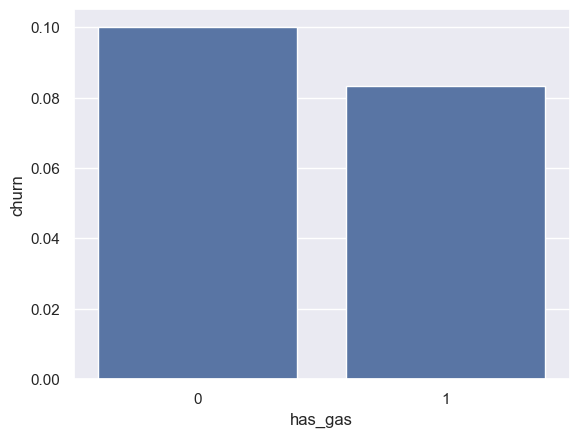

In [123]:
has_gas_sum = pr_client_df.groupby('has_gas').agg({'churn':'mean'}) # Check if there is difference in the mean between 2 group of contract
print(has_gas_sum)
sns.barplot(data=has_gas_sum, x='has_gas', y='churn')

#### Creating dummy variables

    Create dummies for sales channels

In [124]:
# Transform into categorical type
pr_client_df['channel_sales'] = pr_client_df['channel_sales'].astype('category')

# Count the number of entries
pr_client_df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6291
MISSING                             3364
lmkebamcaaclubfxadlmueccxoimlema    1741
usilxuppasemubllopkaafesmlibmsdf    1290
ewpakwlliwisiwduibdlfmalxowmwpci     834
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

The last 3 categories are too rare that their occurences only make up around 0.1% the data.
Drop these categories may reduce dimensionality and over fitting.

Alternative is to group their 3 into one single 'other' group. Dropping these data may make the model lost some valuable rare signals

In [125]:
# One hot encode the sales_channel column
dummies = pd.get_dummies(pr_client_df['channel_sales'], prefix='channel')

# Merge dummies with original dataframe
pr_client_df = pd.concat([pr_client_df, dummies], axis=1)

# Drop rare categories
rare = ['channel_sddiedcslfslkckwlfkdpoeeailfpeds','channel_epumfxlbckeskwekxbiuasklxalciiuu','channel_fixdbufsefwooaasfcxdxadsiekoceaa']
pr_client_df = pr_client_df.drop(columns=rare)

pr_client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'diff_power', 'diff_energy', 'off_peak_peak_var_max_diff',
       'peak_mid_peak_var_max_diff', 'off_peak_mid_peak_var_max_diff',
       'off_peak_peak_fix_max_diff', 'peak_mid_peak_fix_max_diff',
       'off_peak_mid_peak_fix_max_diff', 'tenure', 'months2end',
       'modif_month2present', 'renew_months2present', 'channel_MISSING',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_usilxuppasemubllopkaafesmlibmsdf']

In [126]:
pr_client_df = pr_client_df.drop(columns='channel_sales')

    Create dummies for origin_up

In [127]:
# Transform into categorical type
pr_client_df['origin_up'] = pr_client_df['origin_up'].astype('category')

# Count the number of entries
pr_client_df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    6581
kamkkxfxxuwbdslkwifmmcsiusiuosws    4004
ldkssxwpmemidmecebumciepifcamkci    2890
MISSING                               58
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Similar problem arises in the case of origin_up, this time we will only drop the last 2 dummies

In [128]:
# Create dummies
dummies = pd.get_dummies(pr_client_df['origin_up'], prefix='origin')

# Merge dummies with client data
pr_client_df = pd.concat([pr_client_df,dummies], axis=1)

# Drop rare categories
rare = ['origin_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_ewxeelcelemmiwuafmddpobolfuxioce']
pr_client_df = pr_client_df.drop(columns=rare)
pr_client_df.columns


Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'diff_power', 'diff_energy', 'off_peak_peak_var_max_diff',
       'peak_mid_peak_var_max_diff', 'off_peak_mid_peak_var_max_diff',
       'off_peak_peak_fix_max_diff', 'peak_mid_peak_fix_max_diff',
       'off_peak_mid_peak_fix_max_diff', 'tenure', 'months2end',
       'modif_month2present', 'renew_months2present', 'channel_MISSING',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_usilxuppasemubllopkaafesmlibmsdf', 'origin_MISSING'

In [129]:
pr_client_df = pr_client_df.drop(columns='origin_up')

#### Dealing with skewness

Checking the statistics of skew variables, we notice the standard deviation is very high (~3.6 time the mean for cons_12m).
It is a rule of thumb that std that is more than haft of the mean is considered highly variable.
Although the tree-based model handling the high std much better than logistic regression, this high variability is likely to expose the model to over-fitting.
Solution:

    1. Transfrom them using log
    2. Remove outliner




In [130]:
skews = ['cons_12m', 'cons_gas_12m',  'cons_last_month', 
         'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 
         'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 
         'imp_cons']

# Checking the current variance
pr_client_df[skews].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons
count,1.353600e+04,1.353600e+04,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000
mean,1.599510e+05,2.727077e+04,16036.577275,1871.024169,1383.848183,0.982048,61.956077,0.137802,0.050466,43.107241,151.873657
std,5.782471e+05,1.594234e+05,64374.798721,2351.924554,3184.085534,5.149545,63.857830,0.023308,0.049070,3.743751,331.465092
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.706250e+03,0.000000e+00,0.000000,507.900000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000
50%,1.415000e+04,0.000000e+00,789.000000,1125.650000,314.500000,0.000000,18.740000,0.143168,0.084066,44.311378,38.050000
75%,4.070500e+04,0.000000e+00,3377.250000,2413.542500,1739.000000,0.000000,131.000000,0.146348,0.098837,44.311378,194.367500
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000


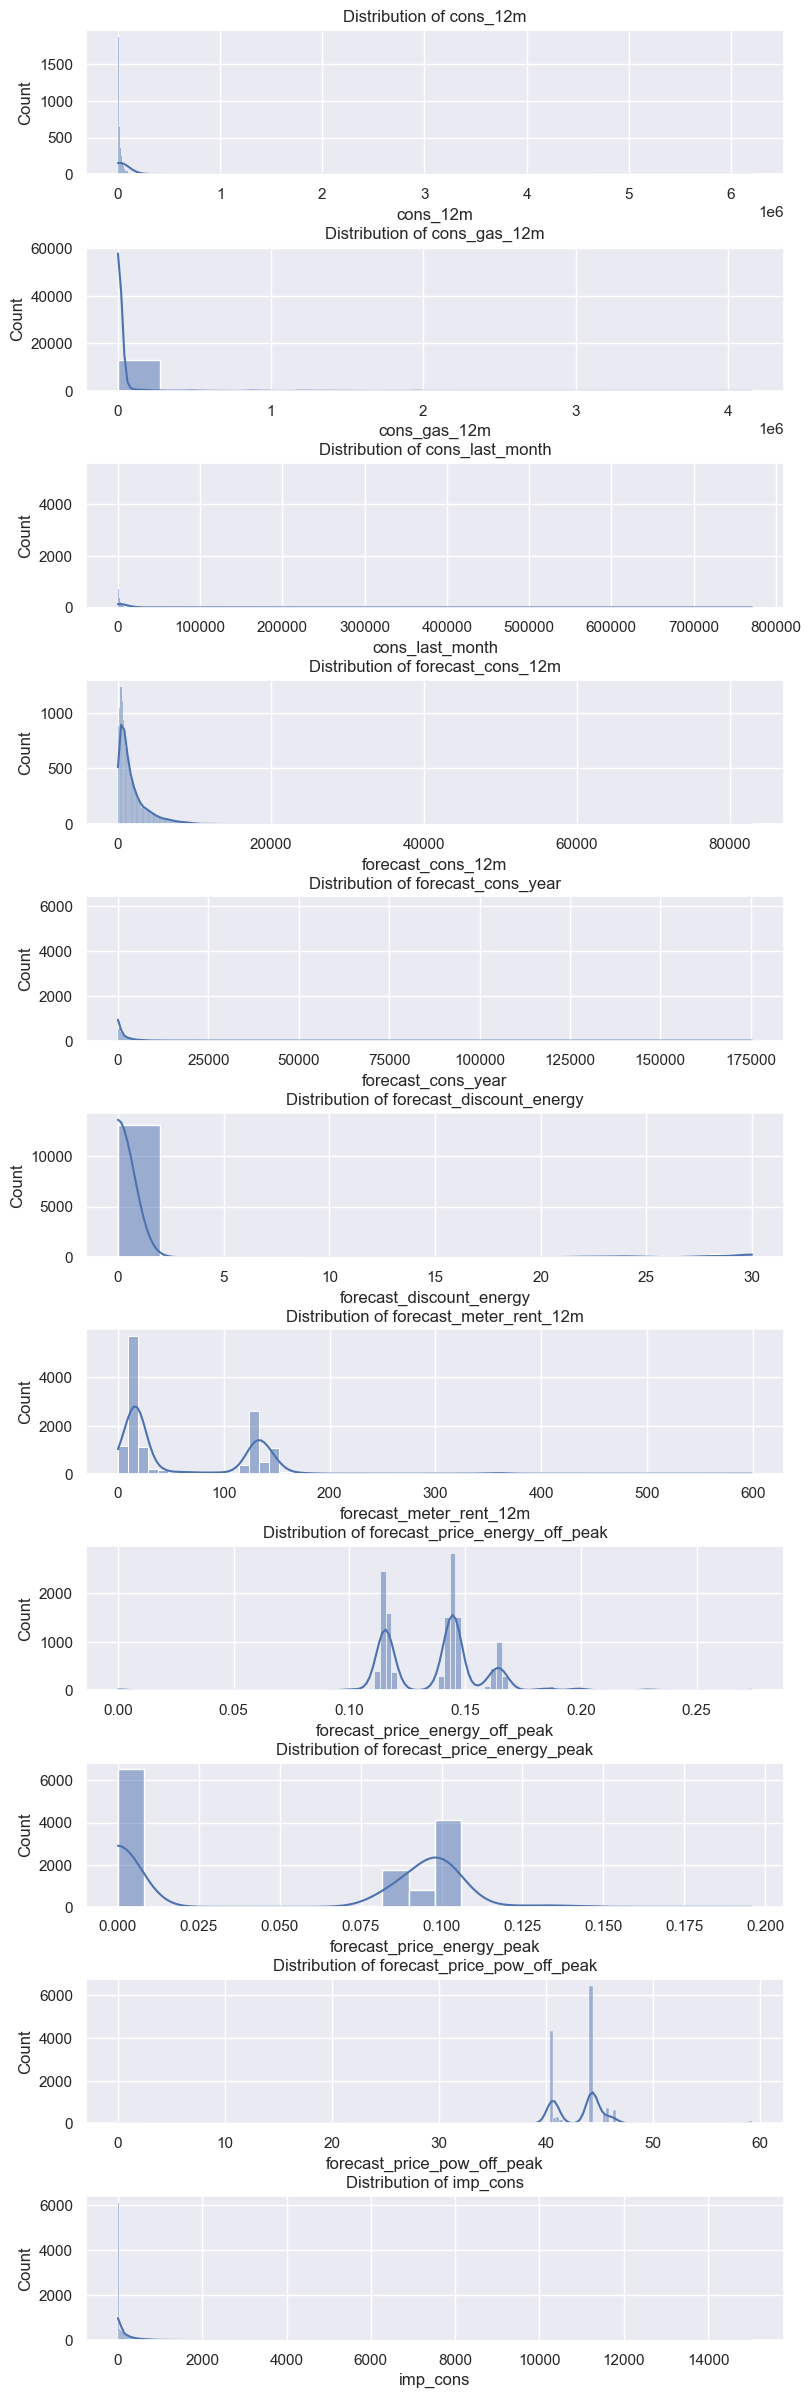

In [131]:
# Plotting the graph
fig, axs = plt.subplots(nrows=len(skews), figsize=(9, 30))

for k, i in enumerate(skews):
    sns.histplot(data=pr_client_df.dropna(), x=i, ax=axs[k], kde=True)
    axs[k].set_title(f'Distribution of {i}')

# Adjust the distance between subplots for axis title visibility
plt.subplots_adjust(hspace=0.5)

plt.show()


In [132]:
# Transform with log base 10
for i in skews:
        pr_client_df[i] = np.log10(pr_client_df[i]+1)

pr_client_df[skews].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons
count,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000
mean,4.234907,0.777407,2.264295,2.983684,1.783398,0.051669,1.515383,0.055976,0.020907,1.638724,1.243591
std,0.855666,1.713086,1.768250,0.636183,1.583895,0.269370,0.564474,0.008901,0.020310,0.109101,1.137447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.756427,0.000000,0.000000,2.706632,0.000000,0.000000,1.235023,0.047796,0.000000,1.619163,0.000000
50%,4.150787,0.000000,2.897627,3.051789,2.498999,0.000000,1.295347,0.058110,0.035056,1.656207,1.591621
75%,4.609658,0.000000,3.528692,3.382835,3.240549,0.000000,2.120574,0.059316,0.040933,1.656207,2.290852
max,6.792889,6.618528,5.887169,4.918575,5.243970,1.491362,2.778376,0.105157,0.077722,1.780075,4.177357


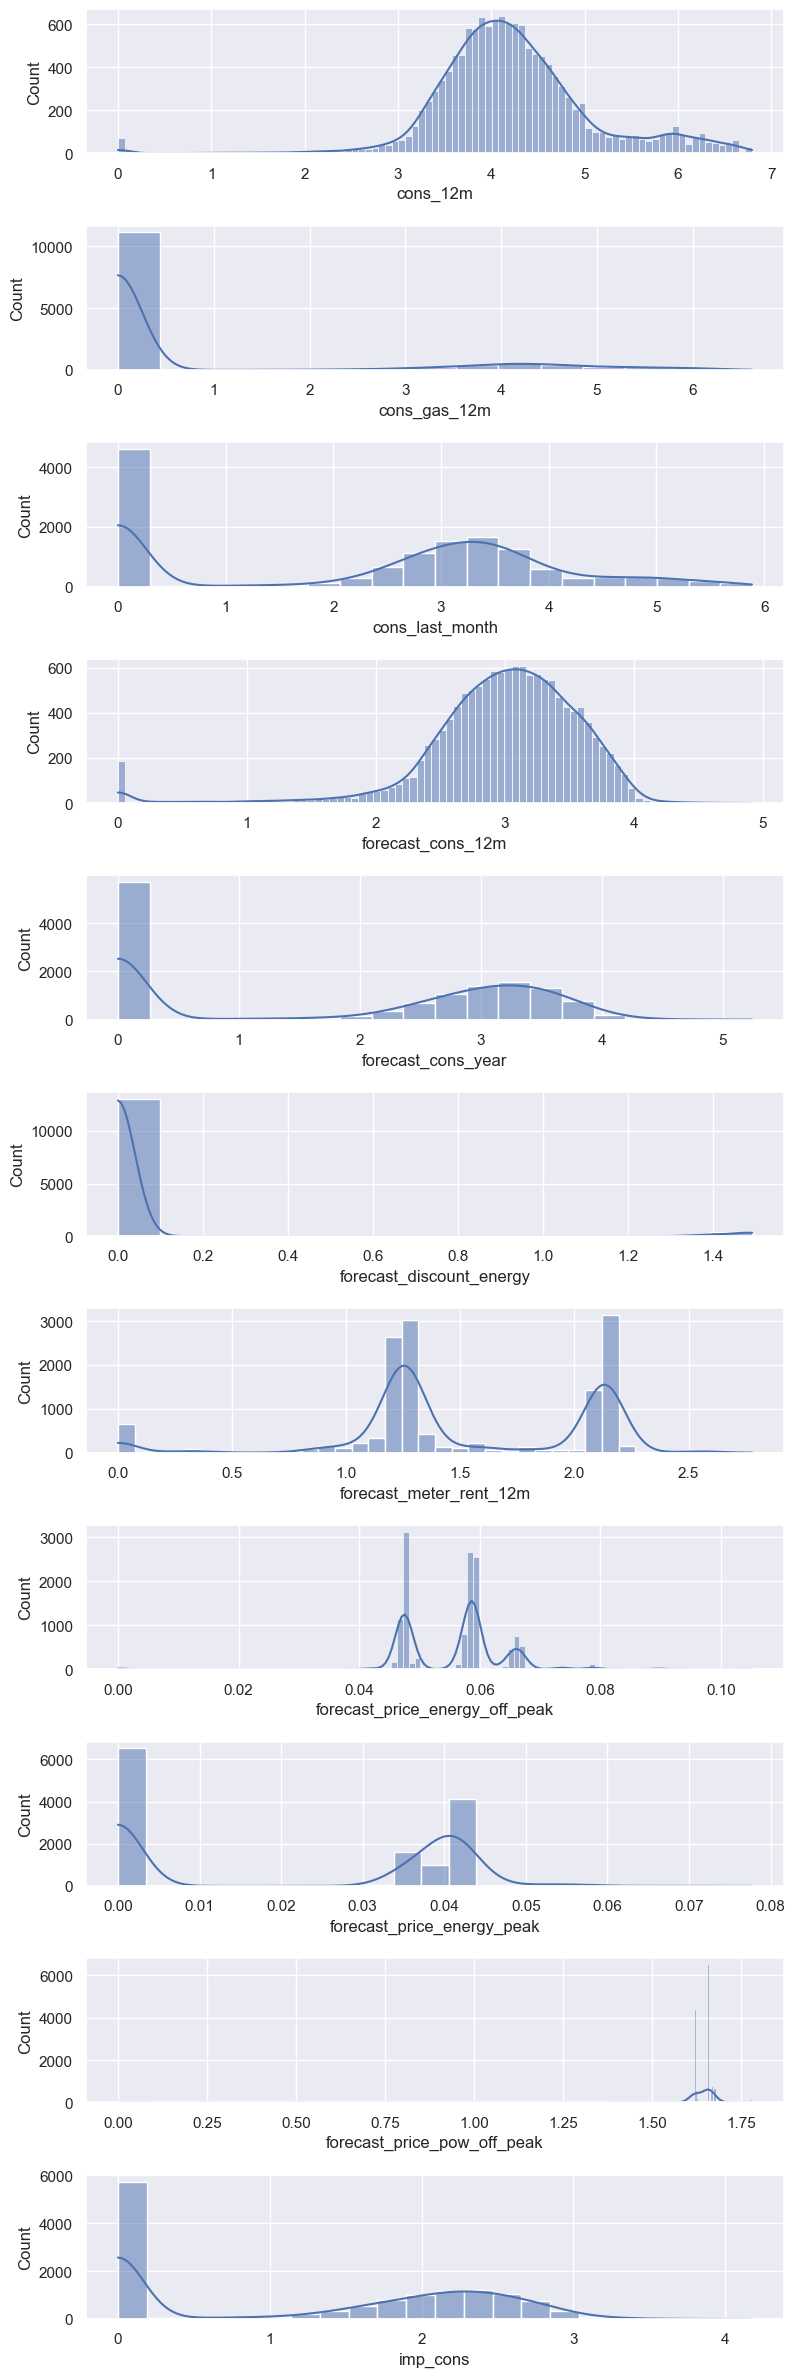

In [133]:
# Distribution after transformation
fig, axs = plt.subplots(nrows=len(skews), figsize=(9,30))

k=0
for i in skews:
    sns.histplot(data=pr_client_df.dropna(), x=i, ax=axs[k], kde=True)
    k += 1

# Adjust the distance between subplot for axis title visibility
plt.subplots_adjust(hspace=0.5)

plt.show()

### Features/Variables Selection

---
1. While forest-based models like Random Forest are more tolerant of multicollinearity (i.e., highly correlated features), it's still a good practice to remove redundant features. Doing so can improve the interpretability of the model and help reduce the risk of overfitting, especially when correlated features add noise or redundancy without increasing predictive power.
=> We remove variables that have high intra-features correlation

In [134]:
corr_matrix = pr_client_df.corr(numeric_only=True)

<Axes: >

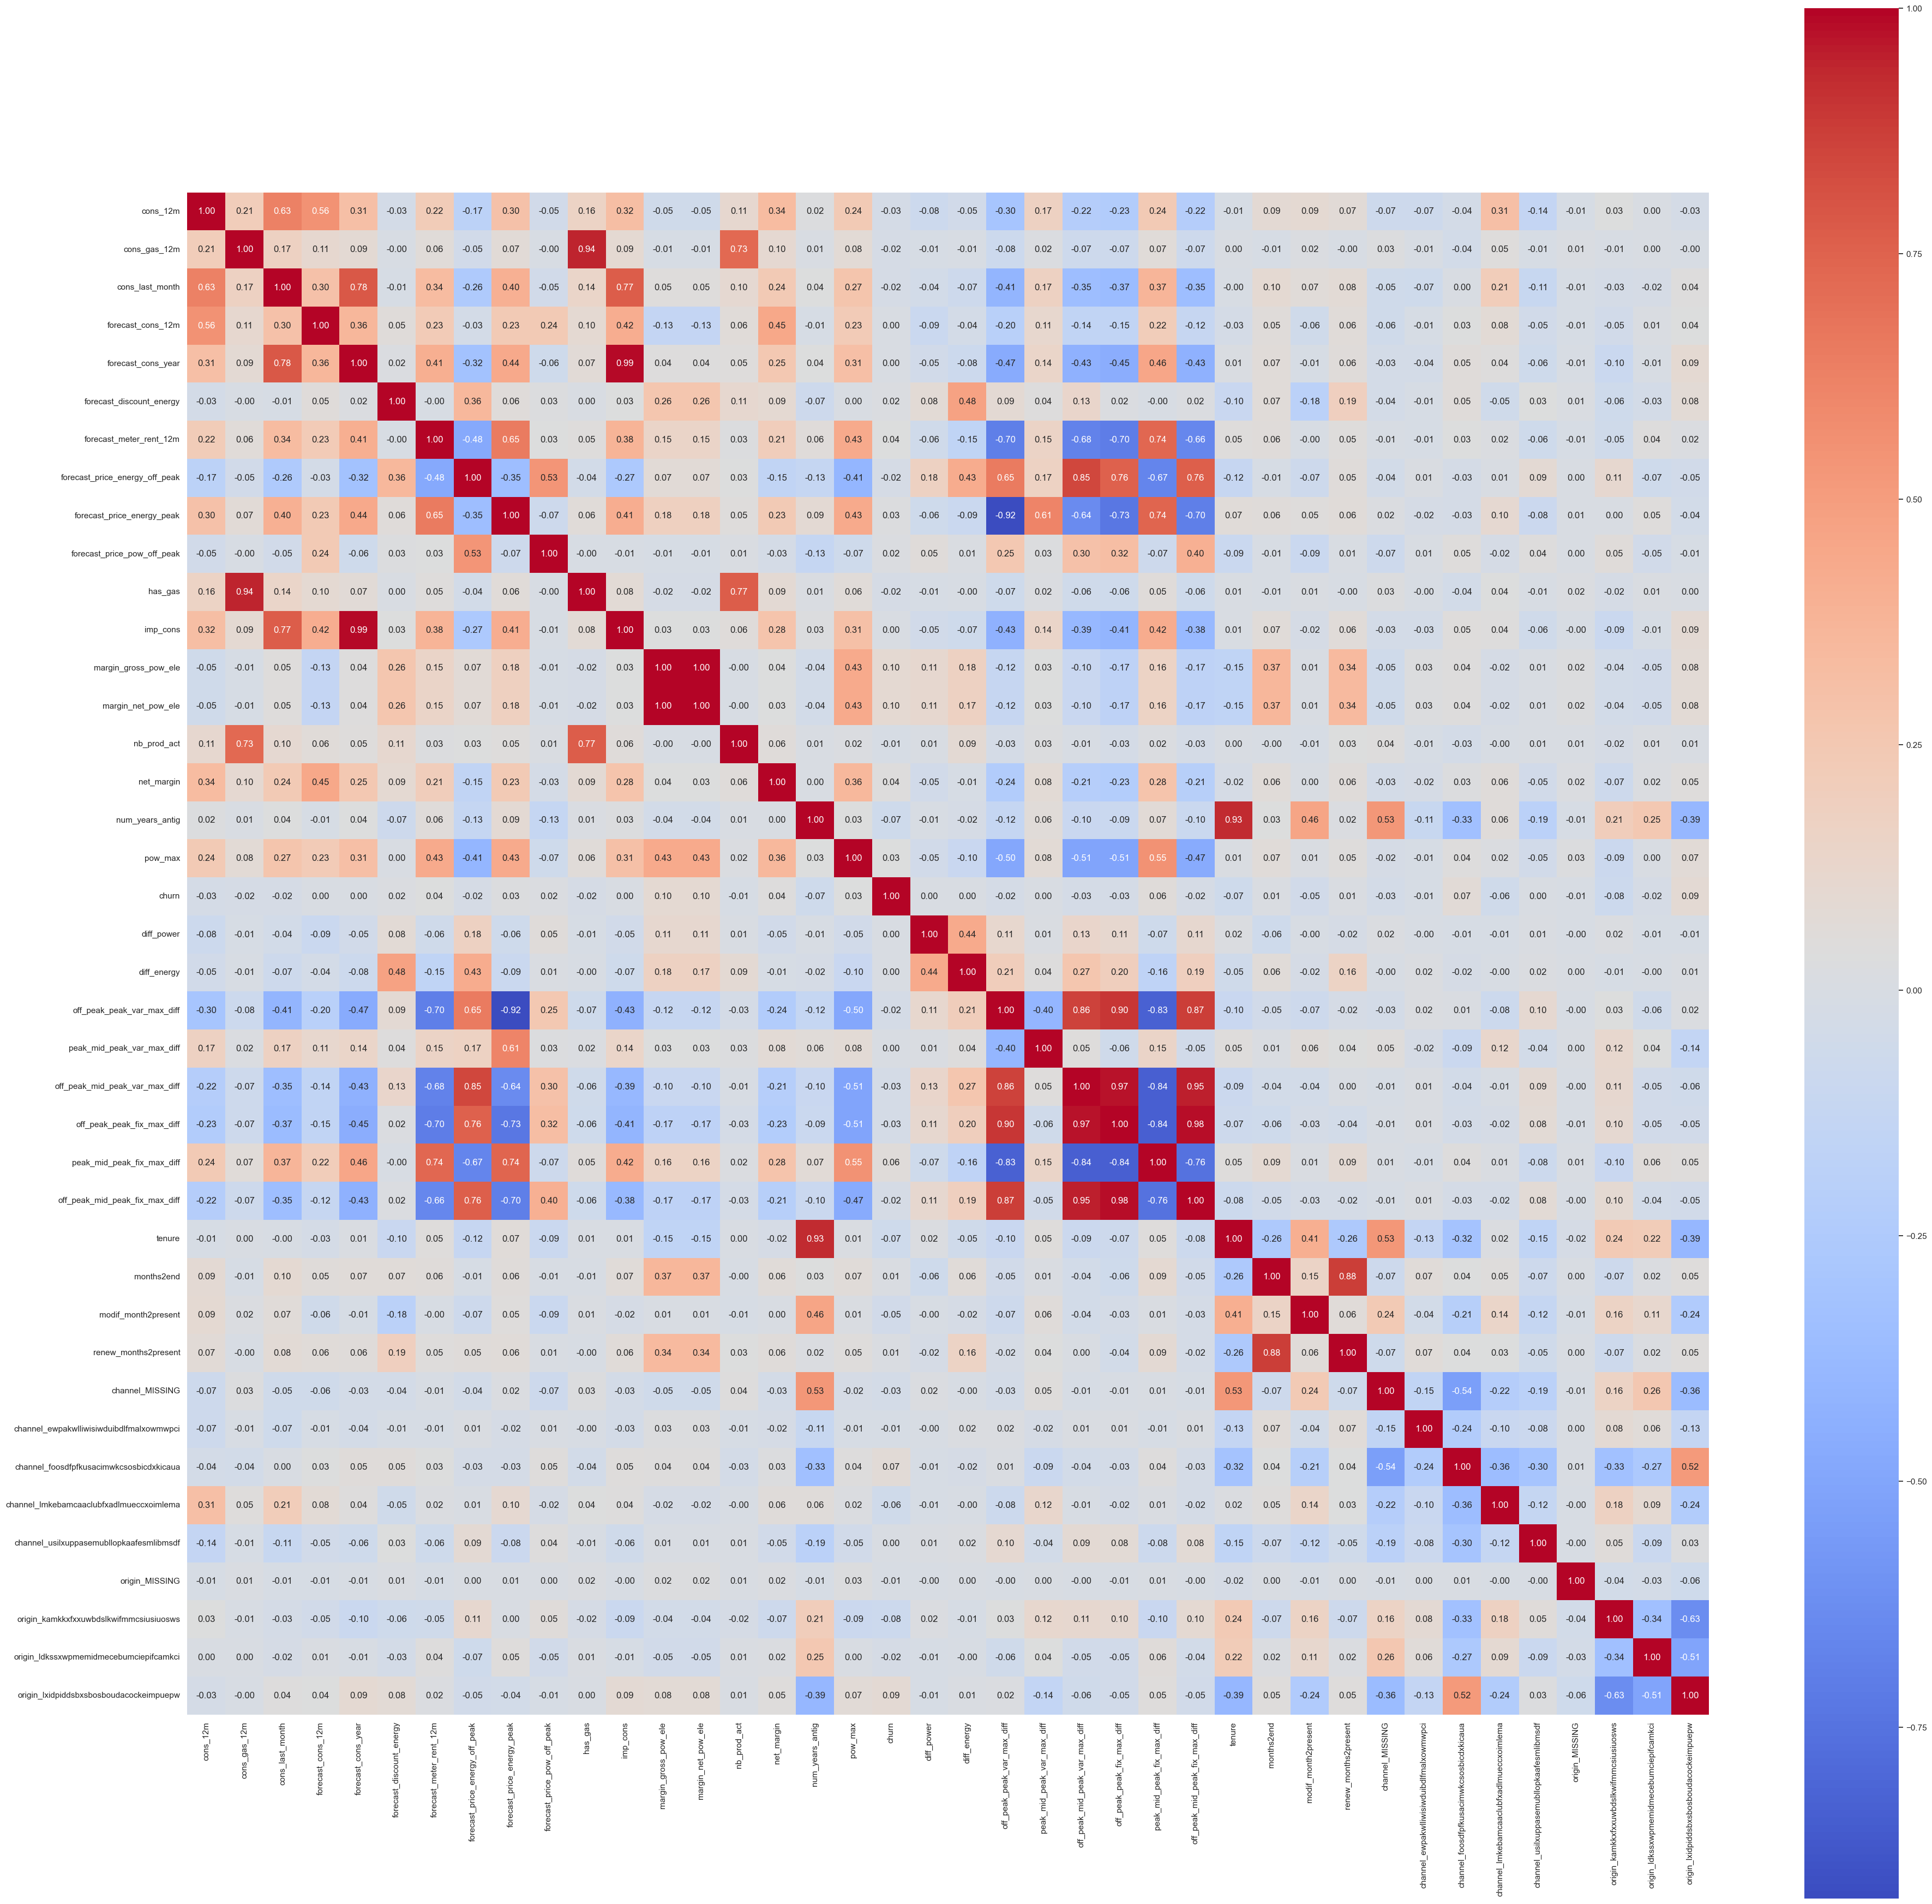

In [135]:
plt.figure(figsize=(45,45))
sns.heatmap(data= corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

In [136]:
# version 1: we remove only columns with correlation over 70%
remove_col_v1 = ['id',
                'forecast_price_energy_off_peak', 'has_gas', 'cons_last_month', 
                'forecast_cons_year', 'forecast_meter_rent_12m','forecast_price_energy_peak','forecast_price_pow_off_peak',
                'num_years_antig', 'renew_months2present', 'off_peak_peak_var_max_diff', 'off_peak_mid_peak_var_max_diff','off_peak_peak_fix_max_diff'
]

# version 2: we remove only the columns with correlation over 85%
remove_col_v2 = ['id',
                 'has_gas','forecast_cons_year','forecast_price_energy_off_peak','num_years_antig',
                 'off_peak_peak_var_max_diff','off_peak_mid_peak_var_max_diff','off_peak_peak_fix_max_diff'
]

In [137]:
pr_client_df_v1 = pr_client_df.drop(columns=remove_col_v1)
pr_client_df_v2 = pr_client_df.drop(columns=remove_col_v2)

In [138]:
pr_client_df_v1.dtypes

cons_12m                                    float64
cons_gas_12m                                float64
forecast_cons_12m                           float64
forecast_discount_energy                    float64
imp_cons                                    float64
margin_gross_pow_ele                        float64
margin_net_pow_ele                          float64
nb_prod_act                                   int64
net_margin                                  float64
pow_max                                     float64
churn                                         int64
diff_power                                  float64
diff_energy                                 float64
peak_mid_peak_var_max_diff                  float64
peak_mid_peak_fix_max_diff                  float64
off_peak_mid_peak_fix_max_diff              float64
tenure                                      float64
months2end                                    int32
modif_month2present                           int32
channel_MISS

## 3. Modeling

Try modeling with data that removes features with over 70% correlation

In [139]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [164]:
# split the data
x = pr_client_df_v1.drop(columns='churn', axis=1)
y = pr_client_df_v1['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the the model
rf1 = RandomForestClassifier(n_estimators=150, random_state=42)

rf1.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [165]:
# Predict
y_pred = rf1.predict(x_test)

# Evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))


Accuracy:  0.9084194977843427
Confusion matrix:  [[2441    4]
 [ 244   19]]
Classification Report:                precision    recall  f1-score   support

           0       0.91      1.00      0.95      2445
           1       0.83      0.07      0.13       263

    accuracy                           0.91      2708
   macro avg       0.87      0.54      0.54      2708
weighted avg       0.90      0.91      0.87      2708



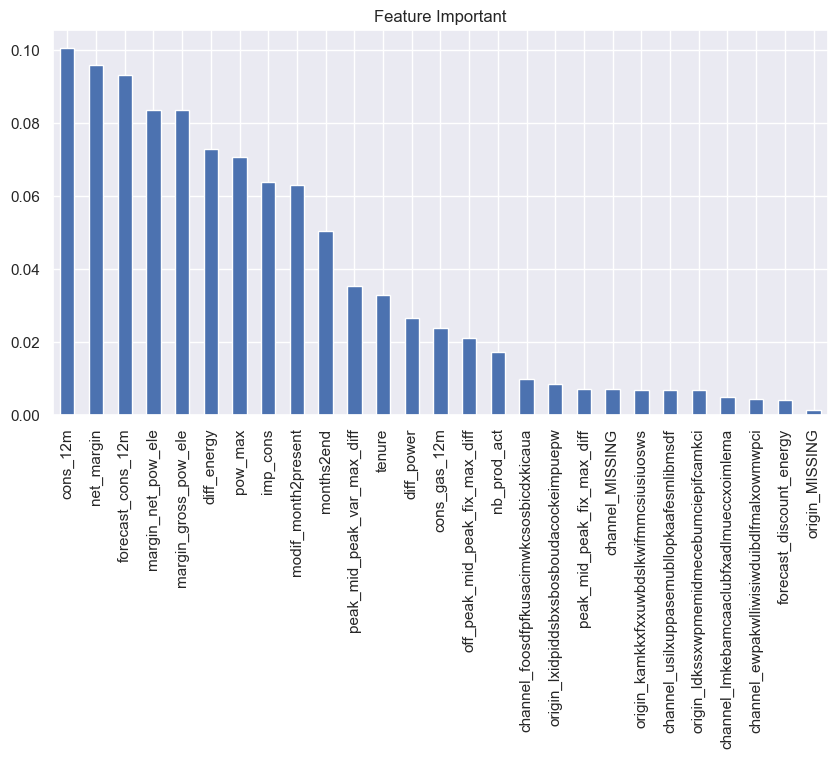

In [142]:
feature_importances = pd.Series(rf1.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Important")
plt.show()

Try modeling with data set that removes features with over 80% correlation

In [163]:
# split the data
x = pr_client_df_v2.drop(columns='churn', axis=1)
y = pr_client_df_v2['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the the model
rf2 = RandomForestClassifier(n_estimators=150, random_state=42)

rf2.fit(x_train, y_train)

# Predict
y_pred = rf2.predict(x_test)

# Evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy:  0.9076809453471196
Confusion matrix:  [[2440    5]
 [ 245   18]]
Classification Report:                precision    recall  f1-score   support

           0       0.91      1.00      0.95      2445
           1       0.78      0.07      0.13       263

    accuracy                           0.91      2708
   macro avg       0.85      0.53      0.54      2708
weighted avg       0.90      0.91      0.87      2708



---
Both models have horrible recall for churn class and the second one has a slightly higher presicion prediction for churn class

The model is really bad at predicting churn with high precision but very lower recall. This means that we are missing a lot of actual churn clients.
One problem is that the number of actual churn clients are to neglectible compared with non-churn clients, hence the imbalance classification problem. We mitigate this imbalance with balanced class weight and oversampling for minority using SMOTE

In [171]:
# import library for SMOTE
from imblearn.over_sampling import SMOTE

# split the data
x = pr_client_df_v1.drop(columns='churn', axis=1)
y = pr_client_df_v1['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Resample only the training set
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Train new model
rf_sm = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
rf_sm.fit(x_train_sm, y_train_sm)

# Predict
y_pred_sm = rf_sm.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("Classification report:\n", classification_report(y_test, y_pred_sm))

Accuracy: 0.9032496307237814
Confusion matrix:
 [[2418   27]
 [ 235   28]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      2445
           1       0.51      0.11      0.18       263

    accuracy                           0.90      2708
   macro avg       0.71      0.55      0.56      2708
weighted avg       0.87      0.90      0.87      2708



---
The model does improve recall by 5% but at the cost of compromising 30% precision.
Next, We adjust the threshold to sacrifice the precision for recall

In [173]:
# import library for SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# split the data
x = pr_client_df_v1.drop(columns='churn', axis=1)
y = pr_client_df_v1['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Resample only the training set
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Train new model
rf_sm = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
rf_sm.fit(x_train_sm, y_train_sm)

# Predict probabilities instead of classes
y_proba = rf_sm.predict_proba(x_test)[:, 1]

# Set custom threshold
threshold = 0.2
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate
print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification report:\n", classification_report(y_test, y_pred_custom))


Threshold: 0.2
Accuracy: 0.7175036927621861
Confusion matrix:
 [[1796  649]
 [ 116  147]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82      2445
           1       0.18      0.56      0.28       263

    accuracy                           0.72      2708
   macro avg       0.56      0.65      0.55      2708
weighted avg       0.87      0.72      0.77      2708



---
Next, we test with more features combined from the existing ones

In [148]:
pr_client_df['cons_change'] = pr_client_df['cons_last_month']/pr_client_df['cons_12m']
pr_client_df['profit'] = pr_client_df['net_margin']/pr_client_df['cons_12m']
pr_client_df['forecast_vs_actual'] = pr_client_df['forecast_cons_12m'] - pr_client_df['cons_12m']
pr_client_df['margin_diff'] = pr_client_df['margin_gross_pow_ele'] - pr_client_df['margin_net_pow_ele']

In [ ]:
print(pr_client_df.shape[0])

pr_client_df_v3 = pr_client_df.drop(columns=remove_col_v1)
pr_client_df_v3 = pr_client_df_v3.dropna()
print(pr_client_df_v3.shape[0])

13536
13465


<Axes: >

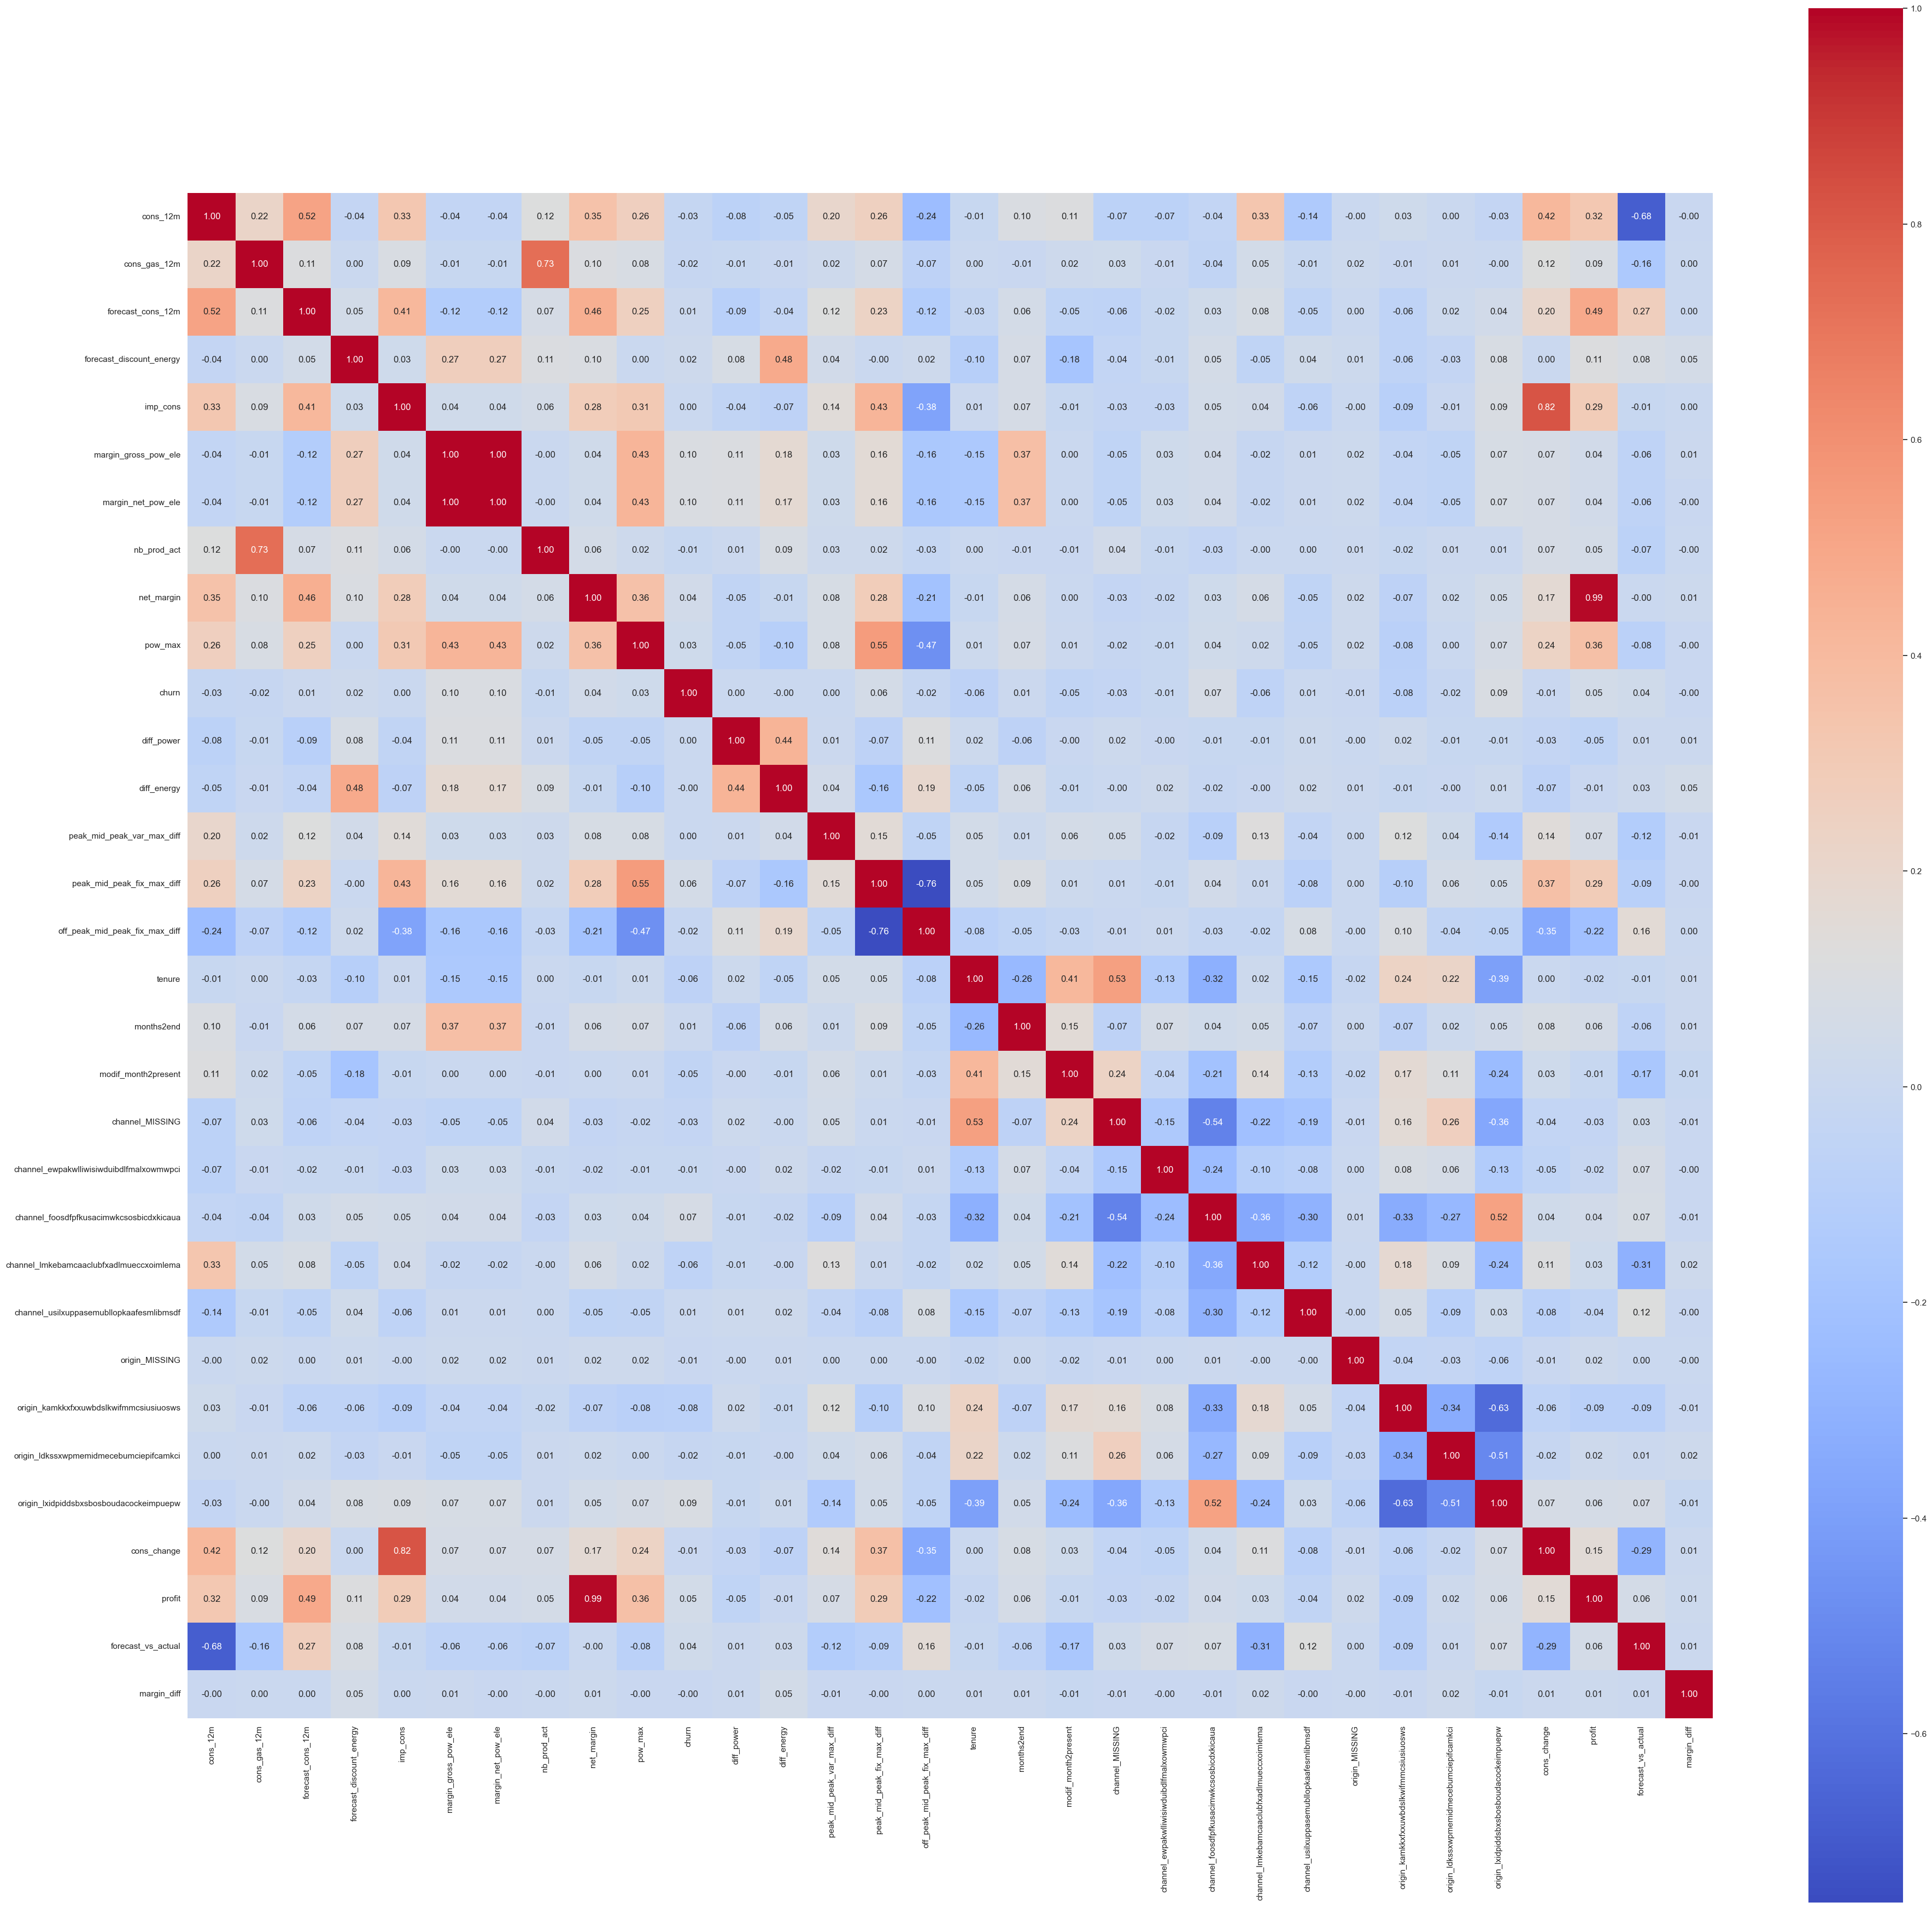

In [155]:
corre = pr_client_df_v3.corr(numeric_only=True)

plt.figure(figsize=(45,45))
sns.heatmap(data= corre, annot=True, cmap='coolwarm', fmt='.2f', square=True)

In [ ]:
# Split the data
x = pr_client_df_v3.drop(columns='churn', axis=1)
y = pr_client_df_v3['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Train the model on SMOTE data
rf3 = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
rf3.fit(x_train_sm, y_train_sm)

# Predict
y_pred_sm = rf3.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("Classification report:\n", classification_report(y_test, y_pred_sm))

Accuracy: 0.8941700705532863
Confusion matrix:
 [[2386   46]
 [ 239   22]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2432
           1       0.32      0.08      0.13       261

    accuracy                           0.89      2693
   macro avg       0.62      0.53      0.54      2693
weighted avg       0.85      0.89      0.87      2693



# Result
After extensive experimentation, all models demonstrated strong performance in identifying non-churn clients but consistently failed to capture a significant portion of churners — the group we most want to retain. The best-performing models were:

- A random forest trained on a dataset with features above 70% correlation removed

- A model with features above 70% correlation removed and trained on resampled data using SMOTE to address class imbalance

- A model trained with all above transformation and adjustment of decision threshold of 0.2

Despite these efforts, the recall on churners remained low (~7–11%), indicating that the dataset likely lacks variables that capture the underlying drivers of churn. As such, our initial modeling hypotheses are not supported by the available data.

It is recommended that future efforts focus on enriching the dataset with more relevant churn-related variables such as client complaints, qualitative survey responses, competitor offers, macroeconomic factors, and interaction logs — potentially uncovered through expert interviews or business insight.

# Business implications

If the cost of promotion program is less the the cost of losing clients, we can still consider using the model with threshold adjustment since it can capture 50% of the actual churn clients, which is quite significant. The predicted churn clients should be given special service, promotion and monitor program while the predicted retained clients should be reviewed manual to detect any unsatisfaction with the company. However, this is mannual process can be very time consuming and inaccurate. It is best to collect data and further refine the model.

Otherwise, we can conclude the all the features and hypotheses we have do not signal churn and we therefore can keep looking for other signals and causes through clients interview or other relevant data.